In [3]:
# Importar dependências
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('precision', 2)

# Criando o objeto modelo e variável para indicar a pasta com os dados
data_path = '../../input/Lake_PreSal_Santos_Basin/v4/'
geo_model = gp.create_model('LakePreSal_V4')

In [4]:
# Inicializando os dados, a extensão e a resolução do modelo.
gp.init_data(geo_model,
             extent=[0, 4000, 0, 12000, -1200, 100],
             resolution=[200, 200, 200],
             path_i=data_path + "surfaces_points.csv",
             path_o=data_path + "orientations_points.csv")

Active grids: ['regular']


LakePreSal_V4  2023-05-08 14:15

In [5]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(geo_model,                         
                         {"Ariri_series": ('ARIRI'),
                          "UBV_series": ('UBV'),
                          "Basement": ('LBV')})

# Ver o grid do modelo
geo_model.grid

Grid Object. Values: 
array([[ 1.00000e+01,  3.00000e+01, -1.19675e+03],
       [ 1.00000e+01,  3.00000e+01, -1.19025e+03],
       [ 1.00000e+01,  3.00000e+01, -1.18375e+03],
       ...,
       [ 3.99000e+03,  1.19700e+04,  8.37500e+01],
       [ 3.99000e+03,  1.19700e+04,  9.02500e+01],
       [ 3.99000e+03,  1.19700e+04,  9.67500e+01]])

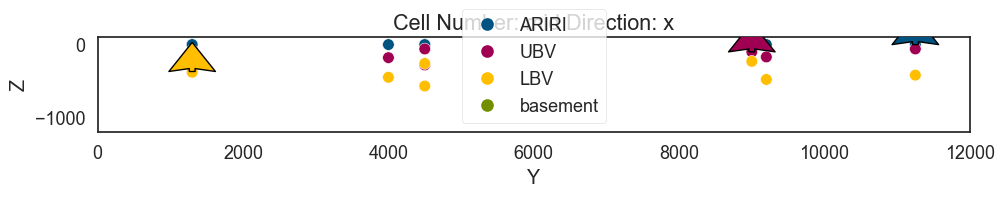

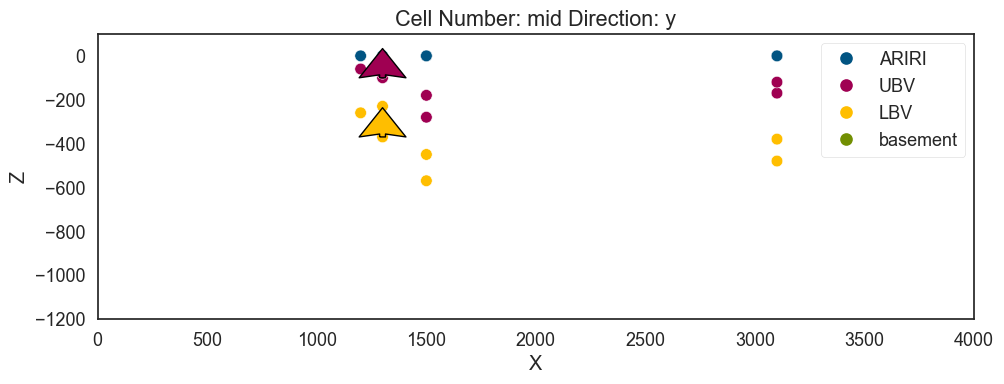

In [6]:
# Ver em 2D os dados nas 3 direções
gp.plot_2d(geo_model, direction=['x'], show_data=True)

gp.plot_2d(geo_model, direction=['y'], show_data=True)

#gp.plot_2d(geo_model, direction=['z'], show_data=True)

In [7]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic', show_data=True)

In [ ]:
# Adicionar uma topografia randômica 
geo_model.set_topography(source='random')
gp.plot_2d(geo_model, show_topography=True, section_names=['topography'])
plt.show() 

In [8]:
%%time
# Interpolador
gp.set_interpolator(geo_model,
                    theano_optimizer='fast_run',
                    compile_theano=True
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                     values
range             12715.74
$C_o$            3849761.9
drift equations  [3, 3, 3]
Wall time: 14.1 s


In [9]:
%%time
# Computar a solução do modelo
sol = gp.compute_model(geo_model, compute_mesh=True)

Wall time: 39.6 s


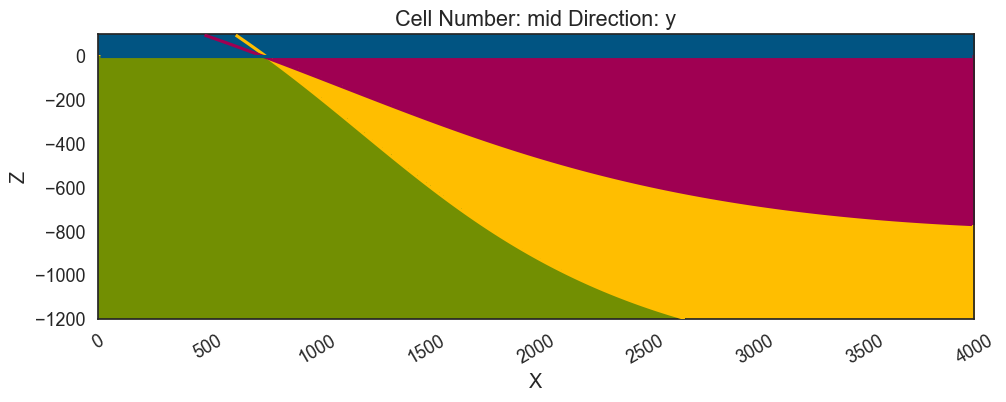

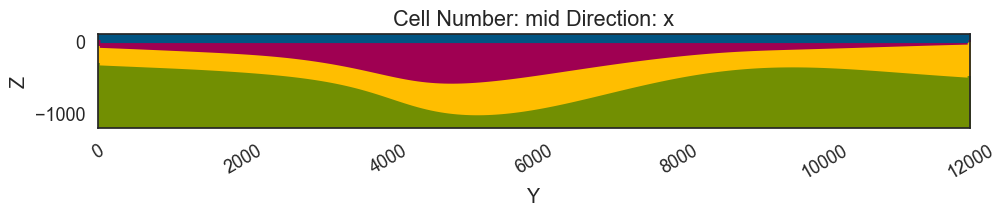

In [10]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True)
gp.plot_2d(geo_model, direction="x", show_data=False, show_lith=True)

In [12]:
# Visualizar o modelo em 3D
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic', show_data=True)

In [ ]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(geo_model)